# Logistic Regression Project Exercise 

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

### Exploratory Data Analysis and Visualization
---
- Perform EDA and explain each graph

### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

**TASK: Create a pairplot that displays the relationships between the following columns:**

**TASK: Create a heatmap that displays the correlation between all the columns.**

# Modeling Task

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

**TASK: Perform a train test split on the data, with the test size of 5% and a random_state of 0.**

**TASK: Create a StandardScaler object and normalize the X train and test set feature data.**

## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

### Coeffecients

**TASK: Report back the model's coefficients.**

**Task: Create a visualization of the coefficients.**

---------

## Model Performance Evaluation

**TASK: Evaluate your model on the remaining 5% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

### Performance Curves

**TASK: Create both the precision recall curve and the ROC Curve.**

# ! ANSWERS BELOW HERE 

## DATA

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

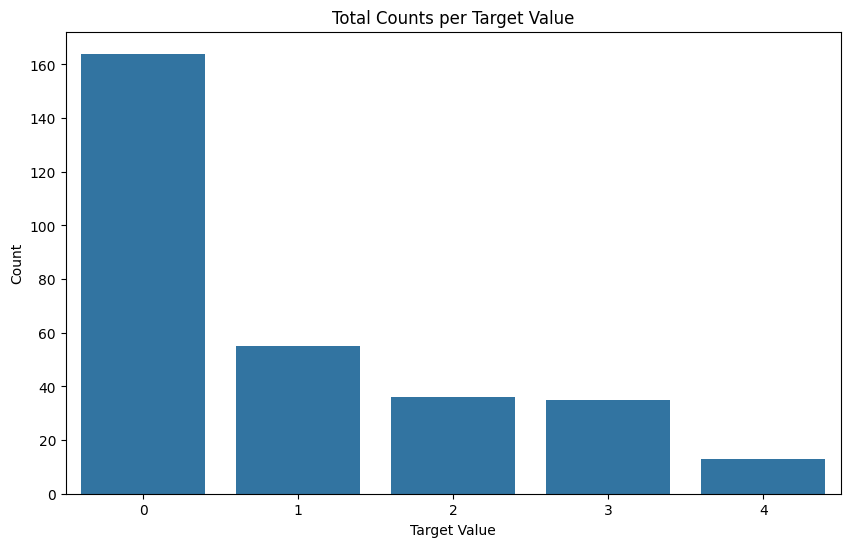

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Define features and targets
X = heart_disease.data.features
y = heart_disease.data.targets

# Combine features and target into a single DataFrame for convenience
df = pd.concat([X, y], axis=1)

# Create a bar plot for the target value counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=y.columns[0])
plt.title('Total Counts per Target Value')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.show()


**TASK: Create a pairplot that displays the relationships between the following columns:**

<Figure size 1200x800 with 0 Axes>

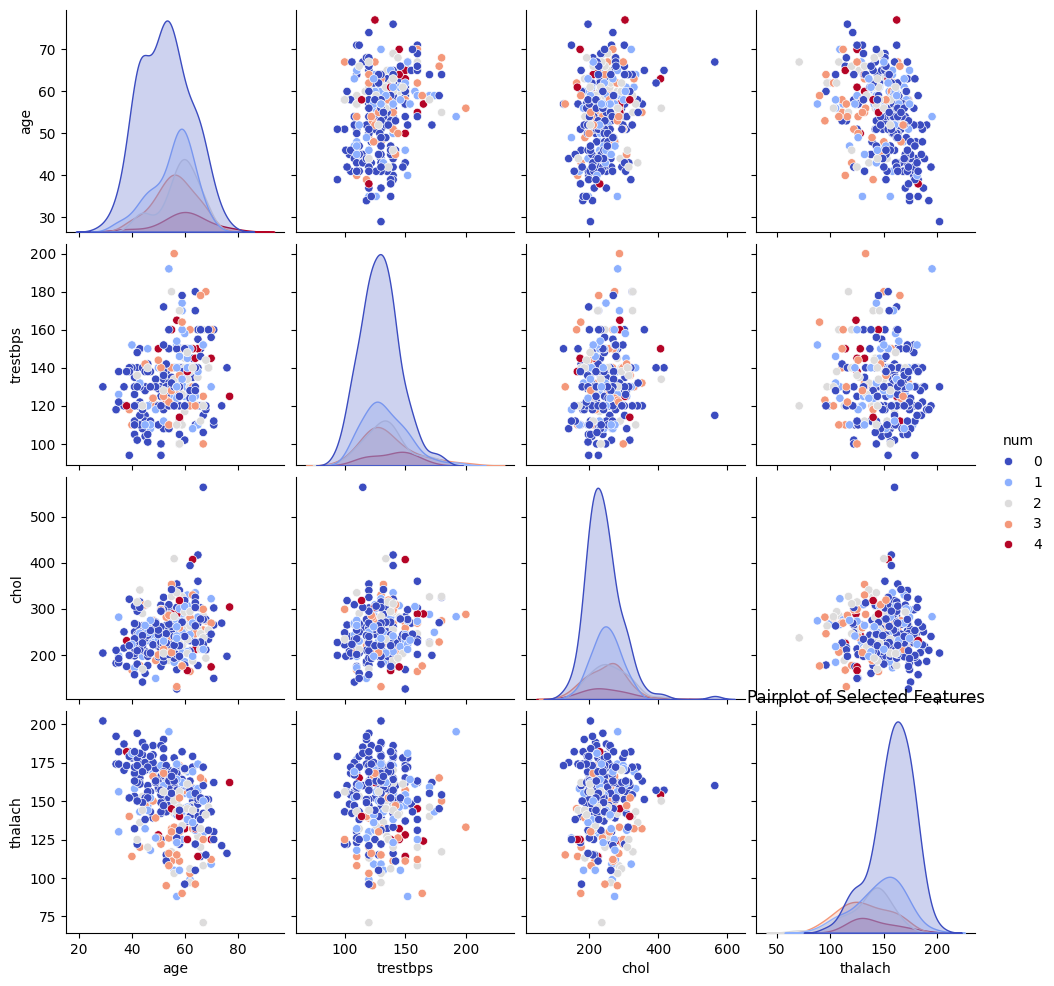

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Define features and targets
X = heart_disease.data.features
y = heart_disease.data.targets

# Combine features and target into a single DataFrame for convenience
df = pd.concat([X, y], axis=1)

# Select specific columns for the pairplot (adjust as necessary)
columns_of_interest = ['age', 'trestbps', 'chol', 'thalach', y.columns[0]]  # Replace with desired column names
selected_df = df[columns_of_interest]

# Create a pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(selected_df, hue=y.columns[0], palette='coolwarm')
plt.title('Pairplot of Selected Features')
plt.show()


**TASK: Create a heatmap that displays the correlation between all the columns.**

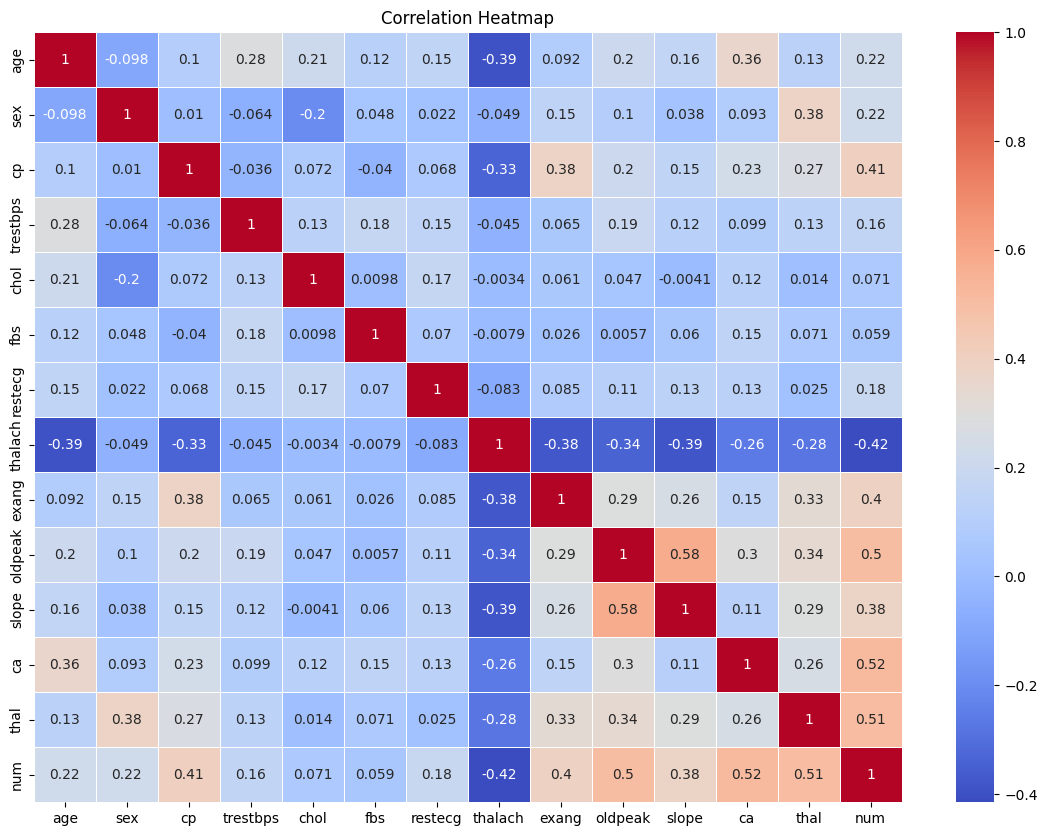

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Define features and targets
X = heart_disease.data.features
y = heart_disease.data.targets

# Combine features and target into a single DataFrame for convenience
df = pd.concat([X, y], axis=1)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [2]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from ucimlrepo import fetch_ucirepo

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Define features and targets
X = heart_disease.data.features
y = heart_disease.data.targets

# Split the data into training and test sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Create a pipeline with a SimpleImputer, StandardScaler, and Logistic Regression model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))
])

# Define the parameter grid to test different values of C
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100]
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train.values.ravel())

# Print the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")


Best parameters: {'logreg__C': 0.01}
Best score: 0.6287542087542087


**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

In [3]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from ucimlrepo import fetch_ucirepo

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Define features and targets
X = heart_disease.data.features
y = heart_disease.data.targets

# Split the data into training and test sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Create a pipeline with a SimpleImputer, StandardScaler, and Logistic Regression model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))
])

# Define the parameter grid to test different values of C
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100]
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train.values.ravel())

# Print the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")


Best parameters: {'logreg__C': 0.01}
Best score: 0.6287542087542087


### Coeffecients

**TASK: Report back the model's coefficients.**

In [8]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from ucimlrepo import fetch_ucirepo

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Define features and targets
X = heart_disease.data.features
y = heart_disease.data.targets

# Split the data into training and test sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Create a pipeline with a SimpleImputer, StandardScaler, and Logistic Regression model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))
])

# Define the parameter grid to test different values of C
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100]
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train.values.ravel())

# Report the model's coefficients
best_model = grid_search.best_estimator_
logreg_model = best_model.named_steps['logreg']
coefficients = logreg_model.coef_[0]
feature_names = X.columns

coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print("\nModel Coefficients:")
print(coeff_df)



Model Coefficients:
     Feature  Coefficient
0        age    -0.077534
1        sex    -0.168565
2         cp    -0.207348
3   trestbps    -0.074032
4       chol    -0.057343
5        fbs     0.022373
6    restecg    -0.087980
7    thalach     0.174700
8      exang    -0.200982
9    oldpeak    -0.193862
10     slope    -0.140238
11        ca    -0.274772
12      thal    -0.270205


**Task: Create a visualization of the coefficients.**

/tmp/ipykernel_77094/2941508229.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='coolwarm')


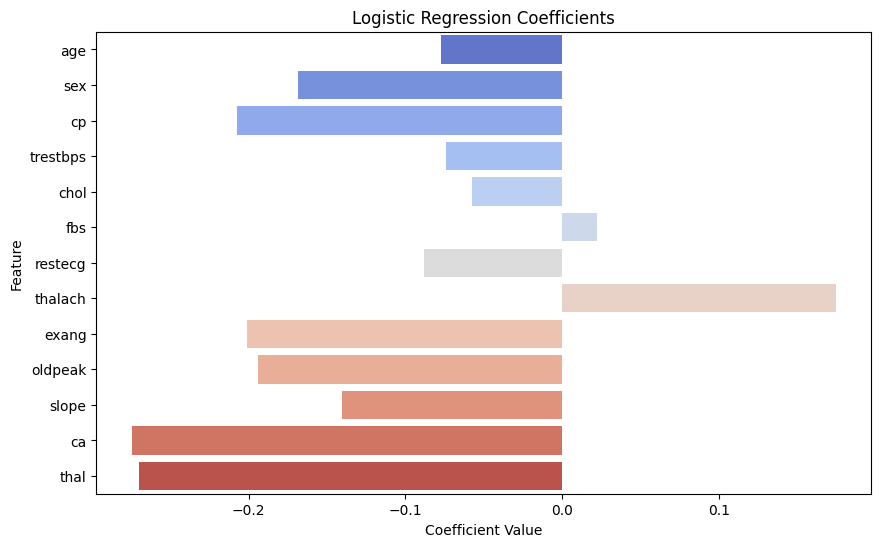

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from ucimlrepo import fetch_ucirepo

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Define features and targets
X = heart_disease.data.features
y = heart_disease.data.targets

# Split the data into training and test sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Create a pipeline with a SimpleImputer, StandardScaler, and Logistic Regression model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))
])

# Define the parameter grid to test different values of C
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100]
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train.values.ravel())

# Get the best model
best_model = grid_search.best_estimator_
logreg_model = best_model.named_steps['logreg']

# Get the coefficients and feature names
coefficients = logreg_model.coef_[0]
feature_names = X.columns

# Create a DataFrame for visualization
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Create a bar plot for the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='coolwarm')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


**TASK: Evaluate your model on the remaining 5% of the data, the test set.**



In [5]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from ucimlrepo import fetch_ucirepo

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Define features and targets
X = heart_disease.data.features
y = heart_disease.data.targets

# Split the data into training and test sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Create a pipeline with a SimpleImputer, StandardScaler, and Logistic Regression model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))
])

# Define the parameter grid to test different values of C
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100]
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train.values.ravel())

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")


Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       0.50      0.17      0.25         6
           2       0.00      0.00      0.00         5
           3       0.10      0.25      0.14         4
           4       0.00      0.00      0.00         3

    accuracy                           0.48        31
   macro avg       0.27      0.28      0.25        31
weighted avg       0.43      0.48      0.43        31

Confusion Matrix:
[[13  0  0  0  0]
 [ 1  1  1  3  0]
 [ 2  0  0  3  0]
 [ 1  1  1  1  0]
 [ 0  0  0  3  0]]
Test Accuracy: 0.4838709677419355


**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [3]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from ucimlrepo import fetch_ucirepo

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Define features and targets
X = heart_disease.data.features
y = heart_disease.data.targets

# Split the data into training and test sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Create a pipeline with a SimpleImputer, StandardScaler, and Logistic Regression model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))
])

# Define the parameter grid to test different values of C
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100]
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train.values.ravel())

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Confusion Matrix Array
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix Array:")
print(conf_matrix)


Confusion Matrix Array:
[[13  0  0  0  0]
 [ 1  1  1  3  0]
 [ 2  0  0  3  0]
 [ 1  1  1  1  0]
 [ 0  0  0  3  0]]


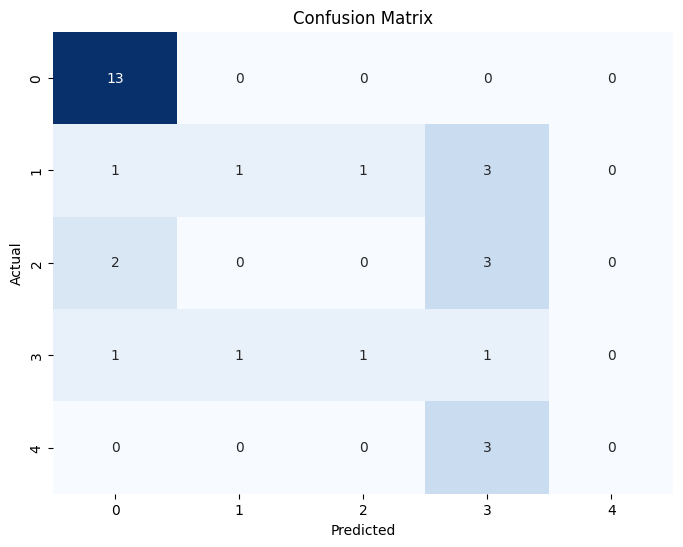

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from ucimlrepo import fetch_ucirepo

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Define features and targets
X = heart_disease.data.features
y = heart_disease.data.targets

# Split the data into training and test sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Create a pipeline with a SimpleImputer, StandardScaler, and Logistic Regression model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))
])

# Define the parameter grid to test different values of C
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100]
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train.values.ravel())

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [6]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from ucimlrepo import fetch_ucirepo

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Define features and targets
X = heart_disease.data.features
y = heart_disease.data.targets

# Split the data into training and test sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Create a pipeline with a SimpleImputer, StandardScaler, and Logistic Regression model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))
])

# Define the parameter grid to test different values of C
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100]
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train.values.ravel())

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Classification Report
class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       0.50      0.17      0.25         6
           2       0.00      0.00      0.00         5
           3       0.10      0.25      0.14         4
           4       0.00      0.00      0.00         3

    accuracy                           0.48        31
   macro avg       0.27      0.28      0.25        31
weighted avg       0.43      0.48      0.43        31

